In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

C:\Users\ibuypower\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from __future__ import print_function
from __future__ import division

from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3d
import matplotlib.pyplot as plt
from matplotlib import animation

import logo_maps as lm

In [3]:
lm.print_bu_logo()

11111111111110001100000000000011
11111111111111001100000000000011
11111111111111001100000000000011
11100000000001101100000000000011
11100000000000101100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000101100000000000011
11100000000001101100000000000011
11100000000001101100000000000011
11100000000011001100000000000011
11111111111110001100000000000011
11111111111100001100000000000011
11111111111100001100000000000011
11111111111110001100000000000011
11100000000011001100000000000011
11100000000001001100000000000011
11100000000001101100000000000011
11100000000000101100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000111100000000000011
11100000000000101110000000000111
11100000000001100111000000001110
11111111111111000011100000011100
1111111111

In [4]:
conferred_hash = lm.degree_hash(lm.CONFERRED, lm.INSTITUTION)
lm.print_ascii_face_32(conferred_hash)

Galen S. Swint, BSCS, 2000-05-13
School of Engineering and Computer Science, Baylor University
10001001010001101010111110010110
10100011101111100111101111010110
10001110001000111001011101010000
01011100011000111011000010110101
01000001111011011110110011001110
00110000010011111111110000001011
11001101010100001000011010000010
11101010001001001100110110010100
00101010110101111011111111000101
11001001011101000001100001101111
11111111010100101000010001011011
01011010000111010001101100011110
01011101000001001001111101011011
01001101001011111110111111001100
10010001001001111001111111110110
11001101101110000001010100010010
00010001110101111101000011101111
00000111101011011001001110011001
01010111001100100100101011001011
00110111100001001111010000001101
11110000011111100100000001110110
00010110100010001111001111001000
11010000001101111000000100001110
10100000110011110011100000101100
01110010010011101110101011111100
01101011100111111100000110100010
00110100001111110010100000110110
00100011110110

In [6]:
def facemap_to_points(facemap):
    '''Return the points arrays dimension 1 and dimension 2 that correspond to 
    the face map. Assumes 32x32'''
    points = {'x':[],'y':[]}
    for charcount in range(len(facemap)):
        if facemap[charcount]=='1':
            points['x'].append(charcount % 32 )
            points['y'].append(32 - charcount // 32 )
    return points

def facemap_to_bitmap(facemap):
    '''Return a bitmap (numeric binary) of a given facemap. Assumes 32x32'''
    bitmap = []
    for i_hat in range(32):
        row = []
        for j_hat in range(32):
            row.append( 1 if facemap[i_hat * 32 + j_hat] == '1' else 0 )
        bitmap.append(row)
    return bitmap
    


In [7]:
conferred_degree_points = facemap_to_points(conferred_hash)
logo_map = lm.bu_logo()
logo_points = facemap_to_points(lm.bu_logo())
logo_bitmap = facemap_to_bitmap(logo_map)
conferred_bitmap = facemap_to_bitmap(conferred_hash)


In [8]:
from matplotlib.pyplot import figure, scatter

def scatter32x32(pointdict):
    plot_fig = figure()
    scatter(pointdict['x'], pointdict['y'])
    return plot_fig


<IPython.core.display.Javascript object>


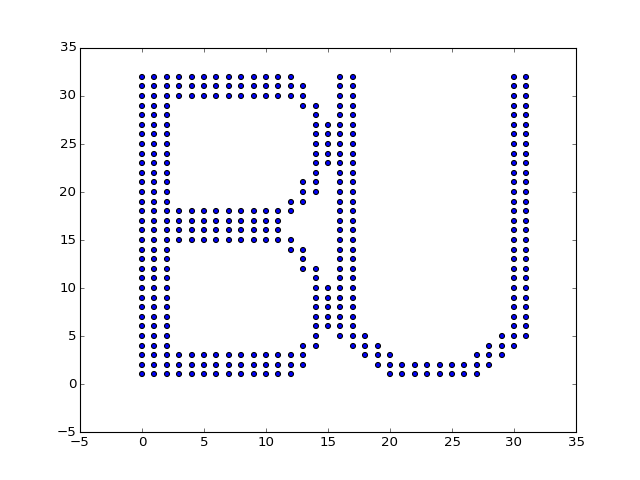

<IPython.core.display.Javascript object>


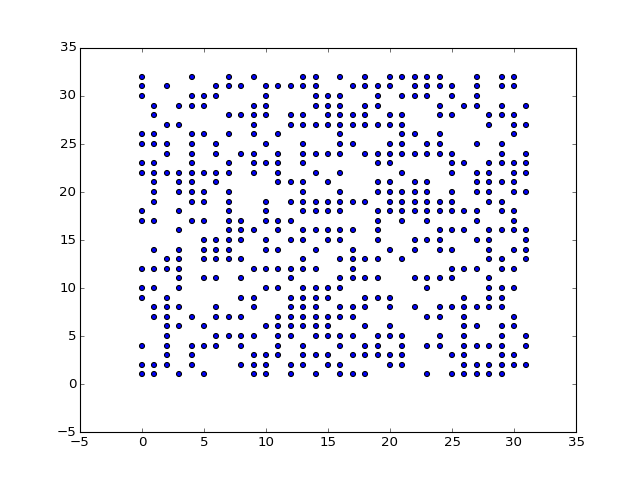

In [9]:
#%%
logo_fig = scatter32x32(logo_points)
#%%
degree_fig = scatter32x32(conferred_degree_points)


In [10]:
cubespace = []
xs = []
ys = []
zs = []

for z in range(32):
    for y in range(32):
        for x in range(32):
            # reverse the order of the y -axis as the bitmaps have y=0 in 
            # top left. Use y,x ordering because stores in rows
            xyz_val = (x, 32-y, z, 
                       conferred_bitmap[y][x] & logo_bitmap[y][z] )
            cubespace.append(xyz_val)
            if xyz_val[3] == 1:
                xs.append(xyz_val[0])
                ys.append(xyz_val[1])
                zs.append(xyz_val[2])

<IPython.core.display.Javascript object>


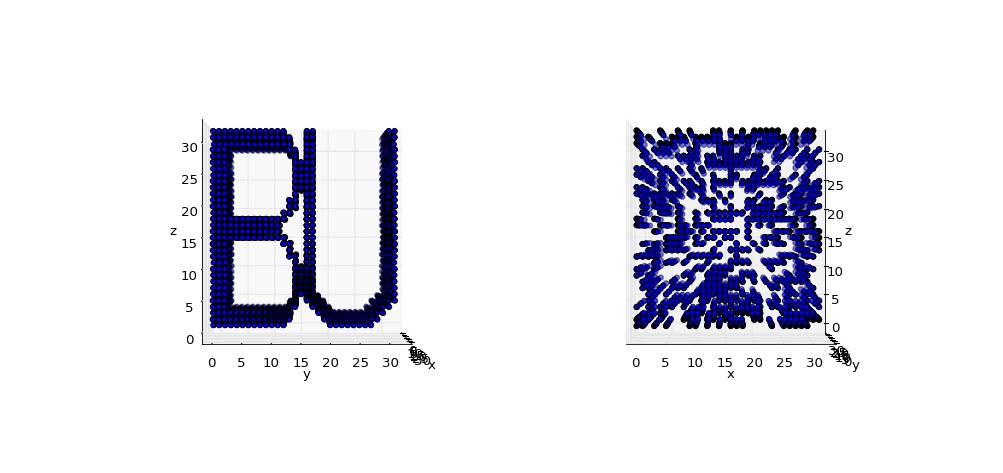

In [14]:
fig3d = plt.figure()
fig3d.set_figheight(16)
fig3d.set_figwidth(8)


for rot in [-90,-45,0]

ax = fig3d.add_subplot(221, projection='3d', 
                       azim=0, elev=0)
ax.scatter(xs, ys, zs, zdir='y' )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim3d(-1, 33)
ax.set_ylim3d(-1, 33)
ax.set_zlim3d(-1, 33)

ax2 = fig3d.add_subplot(222, projection='3d', 
                       azim=-90, elev=0)
ax2.scatter(xs, ys, zs, zdir='y' )
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

ax2.set_xlim3d(-1, 33)
ax2.set_ylim3d(-1, 33)
ax2.set_zlim3d(-1, 33)

fig3d.show()